# baseline score(mse 51xxx) 보다 점수가 낮게 나오도록 프로젝트 도전

In [141]:
# 라이브러리 
import pandas as pd

In [142]:
# 데이터 불러오기
train = pd.read_csv('/aiffel/data/train.csv')
test = pd.read_csv('/aiffel/data/test.csv')

In [143]:
# 데이터 크기
train.shape, test.shape 
#타겟값이 16개로 하나 더 나옴

((39116, 16), (9779, 15))

In [144]:
# 데이터 샘플
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


In [145]:
# 데이터 타입
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [146]:
# 결측치(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [147]:
# 결측치(test)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<AxesSubplot:>

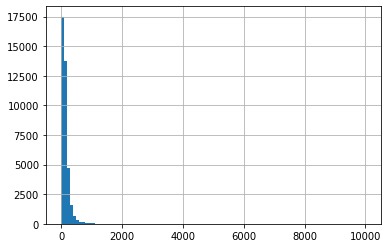

In [148]:
# target(hist)
train['price'].hist(bins=100)

In [149]:
# target(describe)
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [150]:
# 피처(host_id)
train['host_id'].value_counts()

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

In [151]:
# 결측치 컬럼 삭제 (last_review)
train = train.drop('last_review', axis=1)
test = test.drop('last_review', axis=1)

In [152]:
# 결측치 채우기
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)

In [153]:
# 결측치 확인
train.isnull().sum()

id                                 0
name                              12
host_id                            0
host_name                         17
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [154]:
# 가격 값 복사
target = train['price']
train = train.drop('price', axis=1)

In [155]:
# 수치형 피처 선택
cols = [
        'host_id',
        'latitude', 
        'longitude', 
        'minimum_nights',
        'number_of_reviews', 
        'reviews_per_month',
        'calculated_host_listings_count',
        'availability_365'
        ]

train = train[cols]
test = test[cols]

In [156]:
# 검증 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=2022)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 8), (7824, 8), (31292,), (7824,))

In [157]:
# 머신러닝(회귀)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

32000.4623726053

In [158]:
# 릿지 회귀
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.06762e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


32002.921365825365

In [159]:
# 라쏘 회귀
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

32695.606216284894

In [160]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

33521.06875602843

In [161]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=2022)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

31446.66249631902

In [162]:
# Xgboost
from xgboost import XGBRegressor
model = XGBRegressor(random_state=2022)

model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

31838.531510528188

In [163]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# Xgboost
pred = model.predict(test)
mean_squared_error(y_test, pred)

51046.25646764309

# 지예self

In [164]:
# 데이터 불러오기
train = pd.read_csv('/aiffel/data/train.csv')
test = pd.read_csv('/aiffel/data/test.csv')

In [165]:
# 데이터 크기
train.shape, test.shape 
#타겟값이 16개로 하나 더 나옴

((39116, 16), (9779, 15))

In [166]:
# 데이터 샘플
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


In [167]:
# 데이터 타입
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [168]:
# 결측치(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<AxesSubplot:>

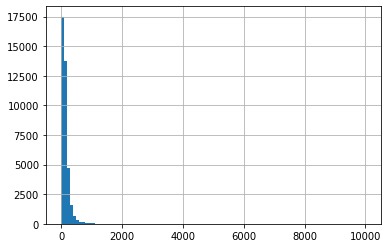

In [169]:
# target(hist)
train['price'].hist(bins=100)

선형변환(균등분포, 정규분포)

In [170]:
# 라이브러리 
import pandas as pd

In [171]:
# 데이터 불러오기
train = pd.read_csv('/aiffel/data/train.csv')
test = pd.read_csv('/aiffel/data/test.csv')

In [172]:
# 결측치(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [173]:
# 결측치(test)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<AxesSubplot:>

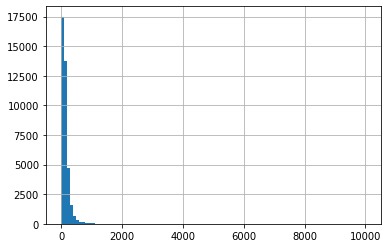

In [174]:
# target(hist)
train['price'].hist(bins=100)

In [175]:
from sklearn.preprocessing import QuantileTransformer

In [176]:
#r균등분포
QT = QuantileTransformer(output_distribution='normal', n_quantiles = 500)

In [177]:
X_train_QT = QT.fit_transform(X_train)
print(X_train_QT)

[[-0.15180205 -0.72245146  1.04624477 ... -0.49692991 -5.19933758
  -5.19933758]
 [ 0.64914251  2.11612353  0.68577234 ...  0.17928308 -5.19933758
  -0.08802133]
 [-0.3140788  -0.62076517 -1.15499343 ... -0.63558017 -5.19933758
  -5.19933758]
 ...
 [-1.08482206 -0.19612422 -1.00692356 ... -0.15890021 -5.19933758
   5.19933758]
 [ 0.40100064  1.59907982  0.41676035 ... -0.27206617  1.45275214
   0.9254932 ]
 [-0.19269998 -0.44095842  0.80303718 ...  0.27728259 -5.19933758
   0.41333838]]


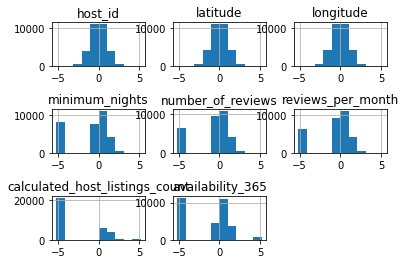

In [178]:
# QuantileTransformer (균등분포)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.DataFrame(X_train_QT, columns=X_train.columns).hist()
plt.subplots_adjust(hspace=1)
plt.show()

In [179]:
#QuantileTransformer (정규분포)
QT2 = QuantileTransformer(output_distribution='normal', n_quantiles=500)

In [180]:
X_train_QT2 = QT2.fit_transform(X_train)
X_train_QT2

array([[-0.15180205, -0.72245146,  1.04624477, ..., -0.49692991,
        -5.19933758, -5.19933758],
       [ 0.64914251,  2.11612353,  0.68577234, ...,  0.17928308,
        -5.19933758, -0.08802133],
       [-0.3140788 , -0.62076517, -1.15499343, ..., -0.63558017,
        -5.19933758, -5.19933758],
       ...,
       [-1.08482206, -0.19612422, -1.00692356, ..., -0.15890021,
        -5.19933758,  5.19933758],
       [ 0.40100064,  1.59907982,  0.41676035, ..., -0.27206617,
         1.45275214,  0.9254932 ],
       [-0.19269998, -0.44095842,  0.80303718, ...,  0.27728259,
        -5.19933758,  0.41333838]])

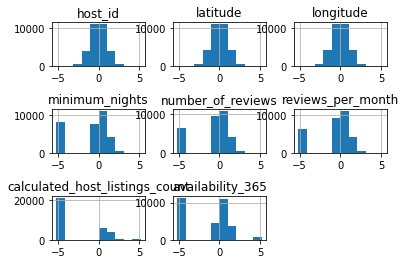

In [181]:
# QuantileTransformer (균등분포)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.DataFrame(X_train_QT2, columns=X_train.columns).hist()
plt.subplots_adjust(hspace=1)
plt.show()

비선형변환-거듭제곱 변환

In [182]:
# 라이브러리 
import pandas as pd

In [183]:
# 데이터 불러오기
train = pd.read_csv('/aiffel/data/train.csv')
test = pd.read_csv('/aiffel/data/test.csv')

In [184]:
from scipy.stats import boxcox
result, params = boxcox(X_train['host_id'])
params

0.19883126655415198

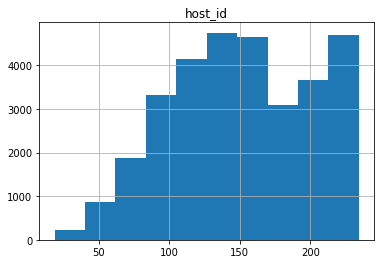

In [185]:
pd.DataFrame(result,columns=['host_id']).hist()
plt.show()

In [186]:
from scipy.stats import boxcox
result, params = boxcox(X_train['calculated_host_listings_count'])
params

-1.2978003739498318

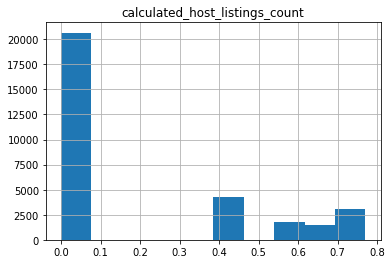

In [187]:
pd.DataFrame(result,columns=['calculated_host_listings_count']).hist()
plt.show()

In [188]:
from scipy.stats import boxcox
result, params = boxcox(X_train['minimum_nights'])
params

-0.4629368412321601

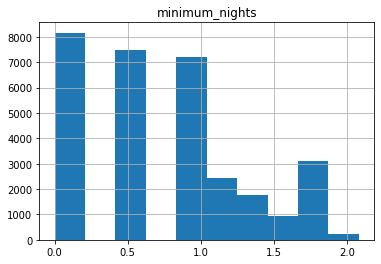

In [189]:
pd.DataFrame(result,columns=['minimum_nights']).hist()
plt.show()

기타-구간분할, 이산화

In [190]:
from pandas import cut
binned = cut(X_train['availability_365'],5)
binned.value_counts()

(-0.365, 73.0]    17217
(292.0, 365.0]     5508
(73.0, 146.0]      3188
(146.0, 219.0]     2805
(219.0, 292.0]     2574
Name: availability_365, dtype: int64

In [191]:
bin_edges = [0,29,59,89,119,float('inf')]
binned2 = cut(X_train['availability_365'],bin_edges)
binned2.value_counts()

(119.0, inf]     11766
(0.0, 29.0]       3298
(59.0, 89.0]      2100
(29.0, 59.0]      1963
(89.0, 119.0]     1024
Name: availability_365, dtype: int64

In [192]:
binned2.head(10)

16787              NaN
26663     (29.0, 59.0]
22132              NaN
7756      (29.0, 59.0]
35587     (29.0, 59.0]
8752       (0.0, 29.0]
16046      (0.0, 29.0]
12752     (59.0, 89.0]
1471     (89.0, 119.0]
1631               NaN
Name: availability_365, dtype: category
Categories (5, interval[float64, right]): [(0.0, 29.0] < (29.0, 59.0] < (59.0, 89.0] < (89.0, 119.0] < (119.0, inf]]

# 데이터 전처리/성능향상 Tip

In [193]:
import pandas as pd

In [194]:
train = pd.read_csv('/aiffel/data/train.csv')
test = pd.read_csv('/aiffel/data/test.csv')

In [195]:
train.shape, test.shape

((39116, 16), (9779, 15))

In [196]:
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


<AxesSubplot:>

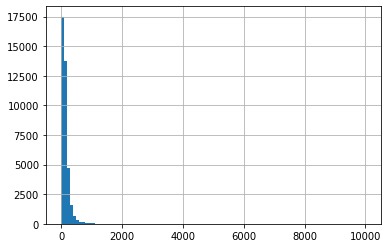

In [197]:
train['price'].hist(bins=100)

비선형변환-로그 변환

In [198]:
import numpy as np
print(train['price'][:3])
print(np.log1p(train['price'])[:3])
print(np.expm1(np.log1p(train['price'])[:3])) #로그로 치환하고 다시 반환하면 문제x

0     70
1    240
2    150
Name: price, dtype: int64
0    4.262680
1    5.484797
2    5.017280
Name: price, dtype: float64
0     70.0
1    240.0
2    150.0
Name: price, dtype: float64


<AxesSubplot:>

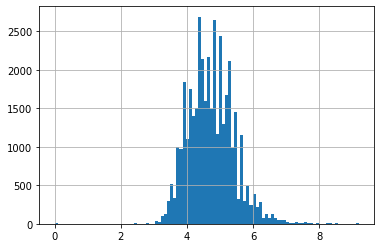

In [199]:
train['price'] = np.log1p(train['price'])
train['price'].hist(bins=100)

In [200]:
target = train['price']
train = train.drop('price', axis=1)

In [201]:
# #수치형 피처 선택
# #수치형 데이터와 범주형 데이터 분리
n_train = train.select_dtypes(exclude='object').copy()
c_train = train.select_dtypes(include='object').copy()
n_test = test.select_dtypes(exclude='object').copy()
c_test = test.select_dtypes(include='object').copy()

In [202]:
# n_train.describe()

In [203]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
cols = ['host_id', 
        'latitude',
        'longitude',
        'minimum_nights',
        'number_of_reviews',
        'reviews_per_month',
        'calculated_host_listings_count',
        'availability_365'
]
display(n_train.head(1))
n_train[cols] = scaler.fit_transform(n_train[cols])
n_test[cols] = scaler.transform(n_test[cols])
display(n_train.head(1))


,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,94219511,40.80167,-73.95781,3,3,0.09,2,0


,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,0.343458,0.731742,0.539318,0.001601,0.004769,0.001368,0.003067,0.0


In [204]:
#id삭제
n_train = n_train.drop('id', axis =1)
n_test = n_test.drop('id', axis =1)
c_train = c_train.drop('last_review', axis=1)
c_test = c_test.drop('last_review', axis=1)

In [205]:
# 오리지널 vs MinMaxScaler 
c_train.head(1)

,name,host_name,neighbourhood_group,neighbourhood,room_type
0,Room in South Harlem near Central Park,Gilles,Manhattan,Harlem,Private room


In [206]:
c_train.describe() #unique 중요

,name,host_name,neighbourhood_group,neighbourhood,room_type
count,39104,39099,39116,39116,39116
unique,38420,9977,5,221,3
top,Home away from home,Michael,Manhattan,Williamsburg,Entire home/apt
freq,15,338,17331,3099,20299


In [207]:
# 범주형 변구

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['neighbourhood_group','neighbourhood','room_type']
        
display(c_train.head(1))
for col in cols:
    c_train[col] = le.fit_transform(c_train[col]) #LabelEncoder (전)
    c_test[col] = le.transform(c_test[col]) #LabelEncoder (후)
display(c_train.head(1)) #문자가 숫자로 변함

,name,host_name,neighbourhood_group,neighbourhood,room_type
0,Room in South Harlem near Central Park,Gilles,Manhattan,Harlem,Private room


,name,host_name,neighbourhood_group,neighbourhood,room_type
0,Room in South Harlem near Central Park,Gilles,2,94,1


In [208]:
del_cols=['name','host_name']
c_train = c_train.drop(del_cols, axis=1)
c_test = c_test.drop(del_cols, axis=1)

In [209]:
#분리한 데이터 다시 합침
train = pd.concat([n_train, c_train], axis=1)
test = pd.concat([n_test, c_test], axis=1)
print(train.shape, test.shape)
train.head() #숫자로 모두 변환

(39116, 11) (9779, 11)


,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
0,0.343458,0.731742,0.539318,0.001601,0.004769,0.001368,0.003067,0.000000,2,94,1
1,0.178671,0.631633,0.478445,0.000801,0.101749,0.028552,0.003067,0.717808,2,95,0
2,0.001595,0.558041,0.449354,0.047238,0.001590,0.003248,0.000000,0.000000,2,209,0
3,0.013033,0.464162,0.579361,0.002402,0.379968,0.049239,0.003067,0.002740,1,13,0
4,0.045468,0.458611,0.543571,0.021617,0.000000,NaN,0.000000,0.000000,1,13,1


In [210]:
# 결측치 채우기
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)

In [211]:
#검증 데이터 분리
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=200)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((31292, 11), (7824, 11), (31292,), (7824,))

In [212]:
#랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=2022, n_estimators=200)
model.fit(x_train, y_train)
pred = model.predict(x_val)

pred = np.expm1(pred)
mean_squared_error(y_val, pred)

22789.861697084398

In [213]:
#Xgboost
from xgboost import XGBRegressor
model = XGBRegressor(max_depth=10, learning_rate=0.02, n_estimators=500, random_state=2022)

model.fit(x_train, y_train)
pred = model.predict(x_val)

pred = np.expm1(pred)
mean_squared_error(y_val, pred)

22194.862218110244

체점

In [214]:
#Xgboost가 성능이 좀 더 좋음
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')
pred = model.predict(test)

pred = np.expm1(pred)
mean_squared_error(y_test, pred)

44971.434929212744

# 회고

여러가지 회귀모델을 구현해본 결과 mse값이 매번 달라짐을 확인 할 수 있었다.
노드에서 알려준 팀을 그대로 구현을 하더라도 mse값이 다름을 볼 수 있다. 그 이전에 구현해본 몇가지 모델들이 있어서 그런 듯 하지만 아직 정확한 사유는 파악하지 못했다. 회귀 모델이 선형회귀, 로지스틱회귀, 리지회귀, 라쏘회귀, 다항회귀로 대표적 다섯가지가 있지만 다 구현해보진 못했지만 결과가 51보다 낮게 나와 만족할 수 있는 수업이 되었다!
